In [17]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from proj1_helpers import *
DATA_TRAIN_PATH = 'data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

with open(DATA_TRAIN_PATH) as f:
    labels = f.readline().split(',')[2:] #remove 2 first, being ID and prediction
df=pd.read_csv(DATA_TRAIN_PATH)


In [13]:
df.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


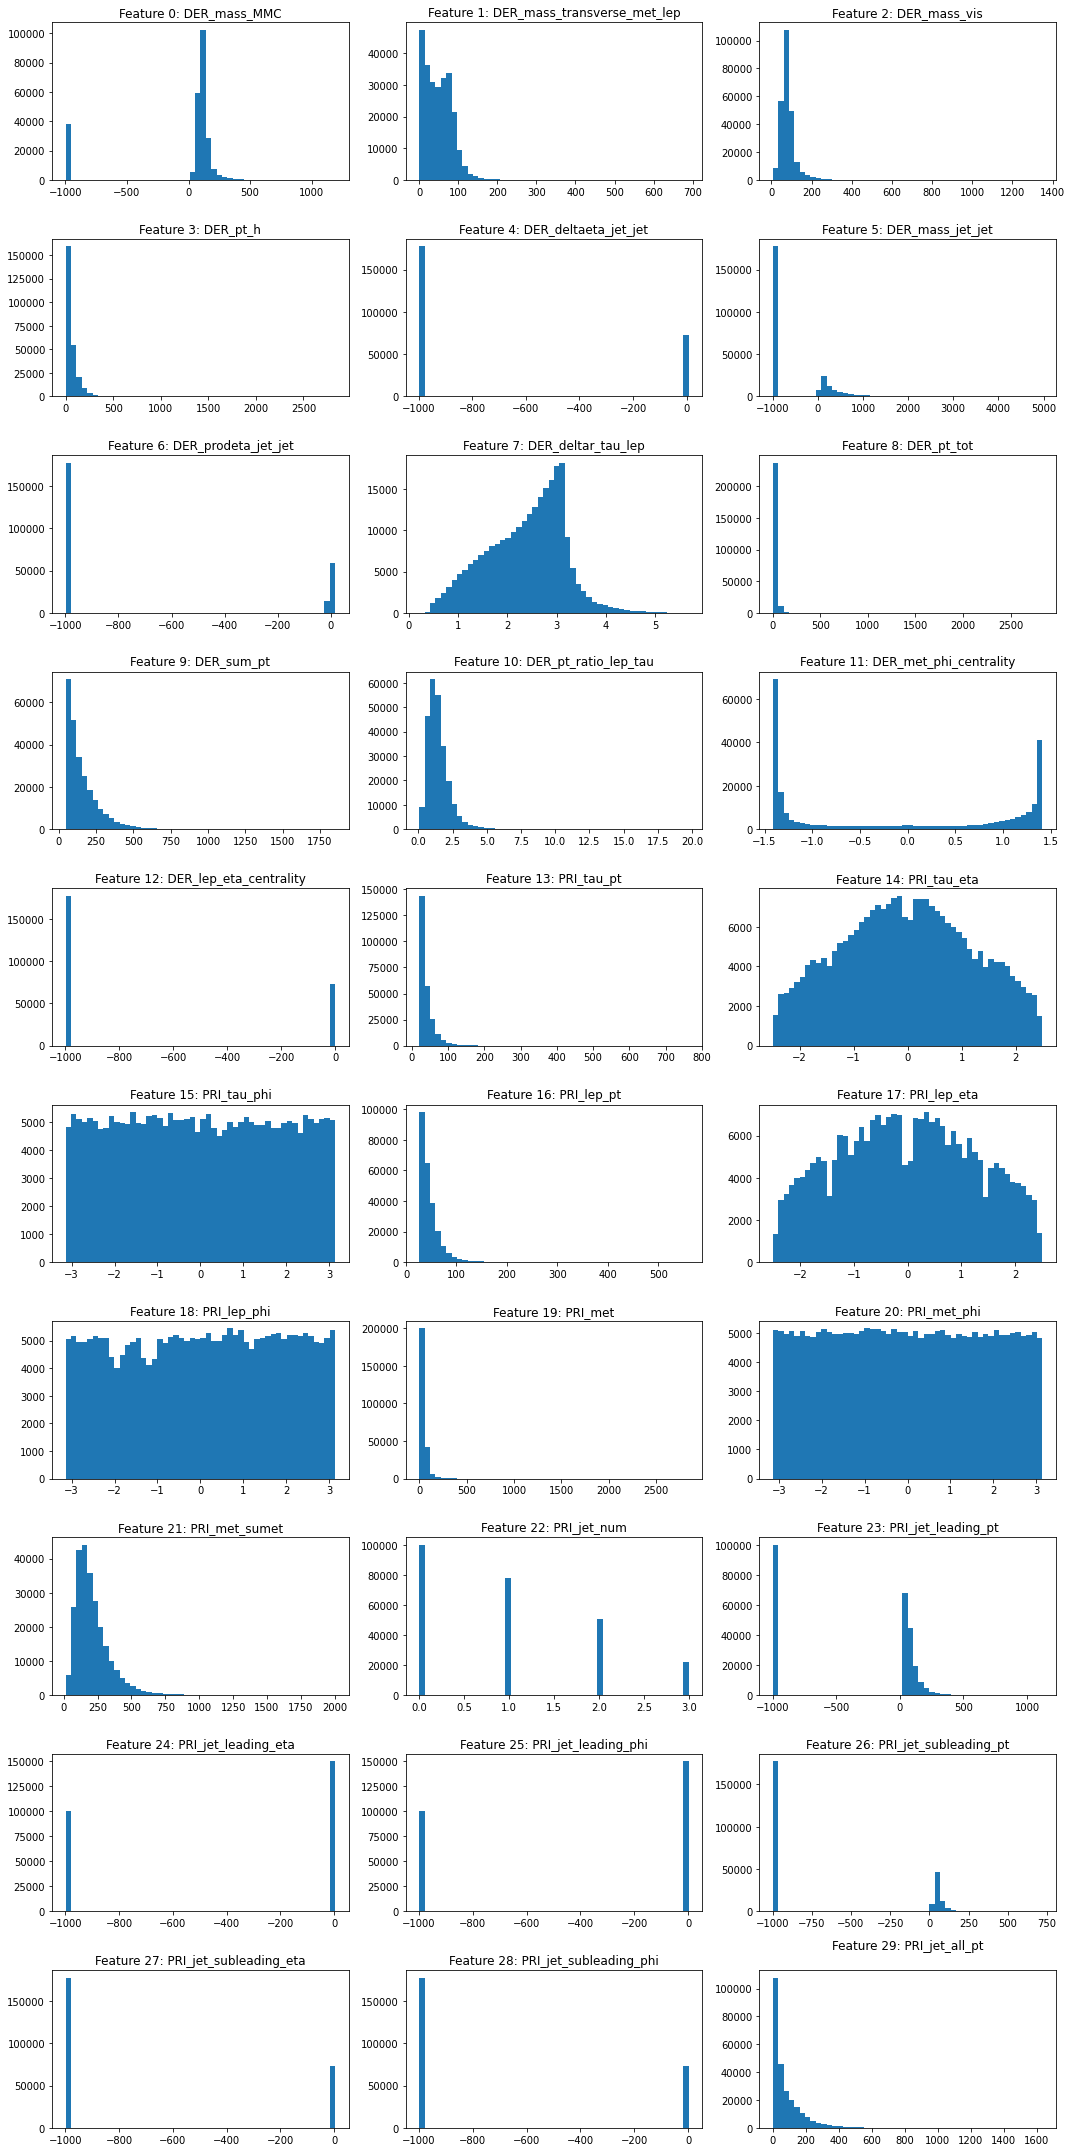

In [8]:
def plot_features_distrib(tX):
    plt.figure(figsize=(15,30))
    for i in range(tX.shape[1]):
        plt.subplot(10,3,i+1)
        plt.hist(tX[:,i], bins=50);
        plt.title("Feature {}: {}".format(i, labels[i]))
    plt.tight_layout()
    plt.show();
plot_features_distrib(tX)

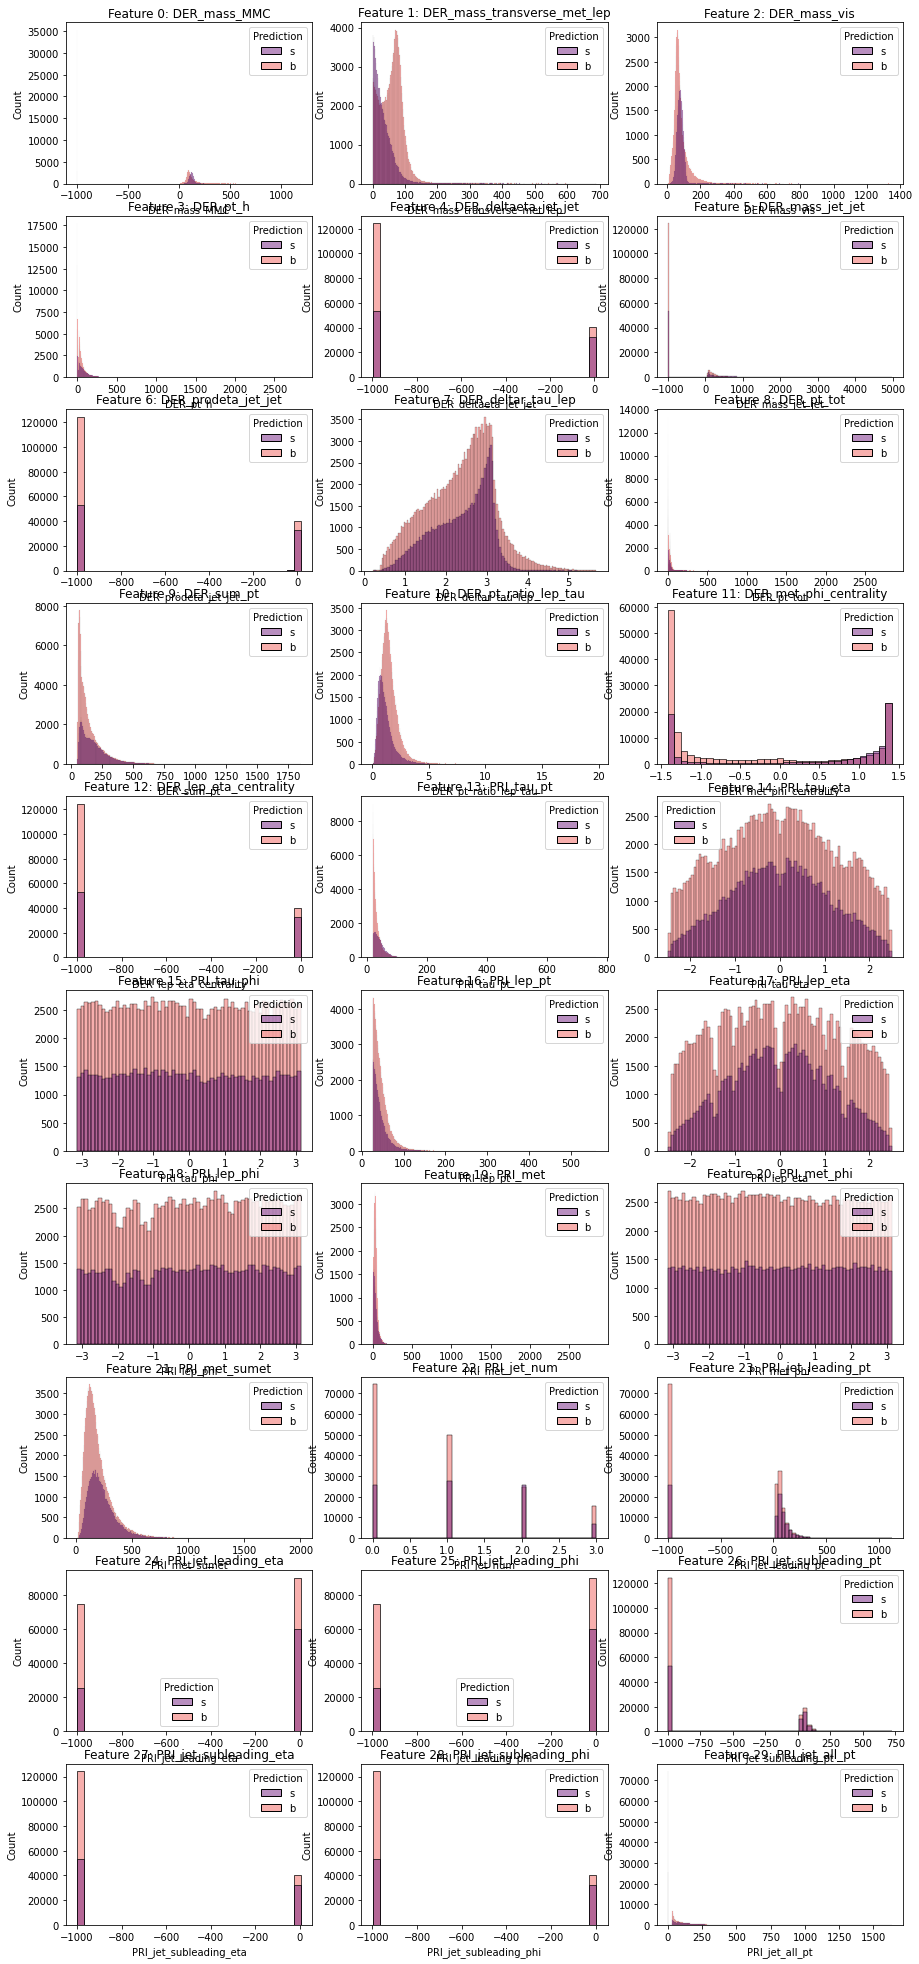

In [39]:
def seaborn_plot_features(df):
    f, a = plt.subplots(10, 3, figsize=(15, 35))
    i=0
    for feature_name in df.columns[2:]:
        plt.subplot(10,3,i+1)
        sns.histplot(data=df, hue='Prediction', x=feature_name, palette="magma", multiple="layer").set_title("Feature {}: {}".format(i, feature_name))
        i+=1
seaborn_plot_features(df)

<AxesSubplot:>

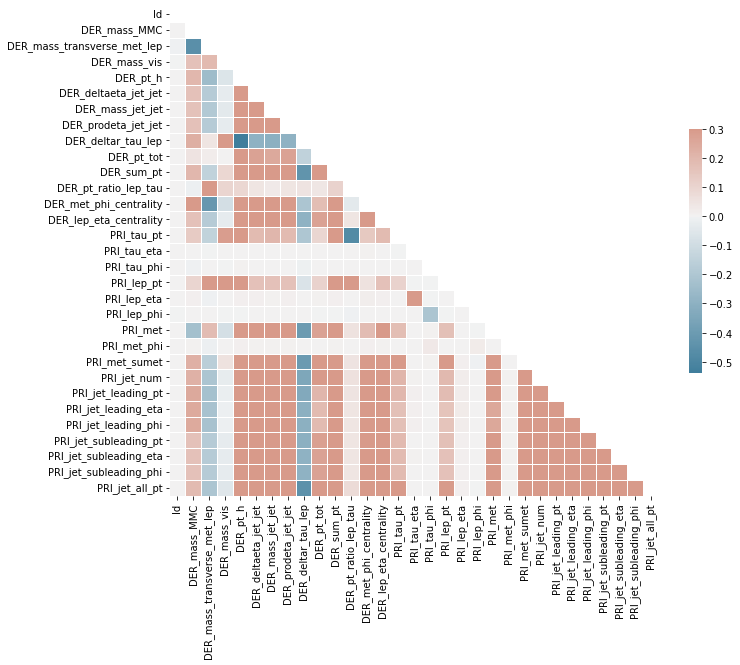

In [20]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [42]:
df.count()

Id                             250000
Prediction                     250000
DER_mass_MMC                   250000
DER_mass_transverse_met_lep    250000
DER_mass_vis                   250000
DER_pt_h                       250000
DER_deltaeta_jet_jet           250000
DER_mass_jet_jet               250000
DER_prodeta_jet_jet            250000
DER_deltar_tau_lep             250000
DER_pt_tot                     250000
DER_sum_pt                     250000
DER_pt_ratio_lep_tau           250000
DER_met_phi_centrality         250000
DER_lep_eta_centrality         250000
PRI_tau_pt                     250000
PRI_tau_eta                    250000
PRI_tau_phi                    250000
PRI_lep_pt                     250000
PRI_lep_eta                    250000
PRI_lep_phi                    250000
PRI_met                        250000
PRI_met_phi                    250000
PRI_met_sumet                  250000
PRI_jet_num                    250000
PRI_jet_leading_pt             250000
PRI_jet_lead

/home/lucastrg/FLEP/MA1/ML/cs-433/env/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


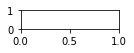

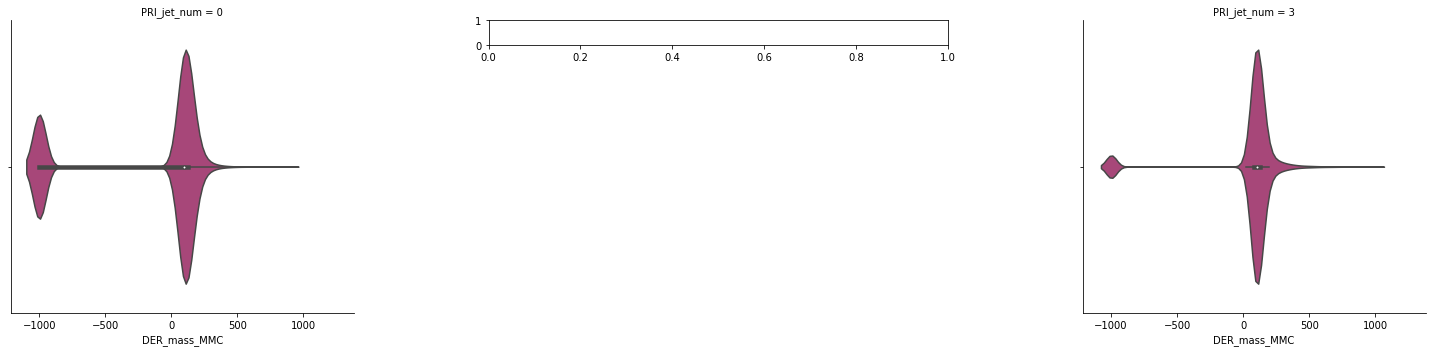

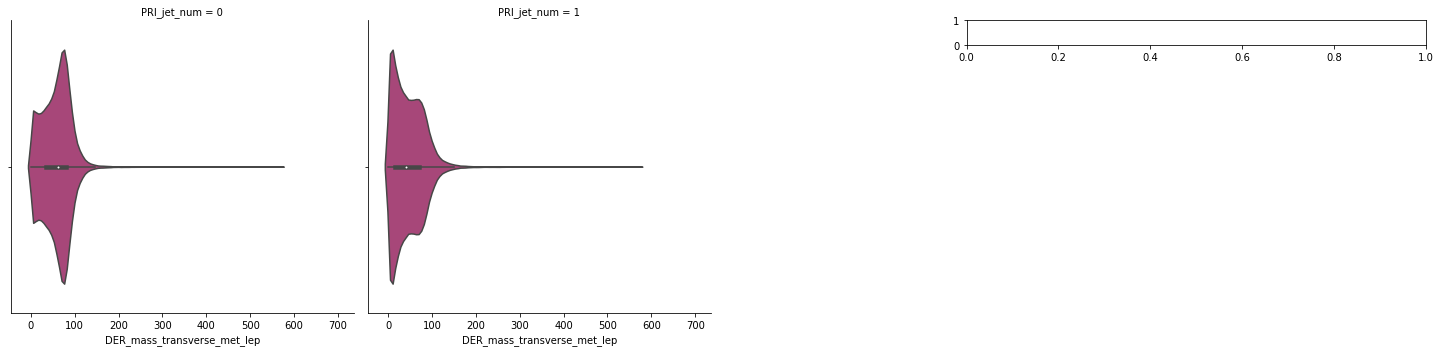

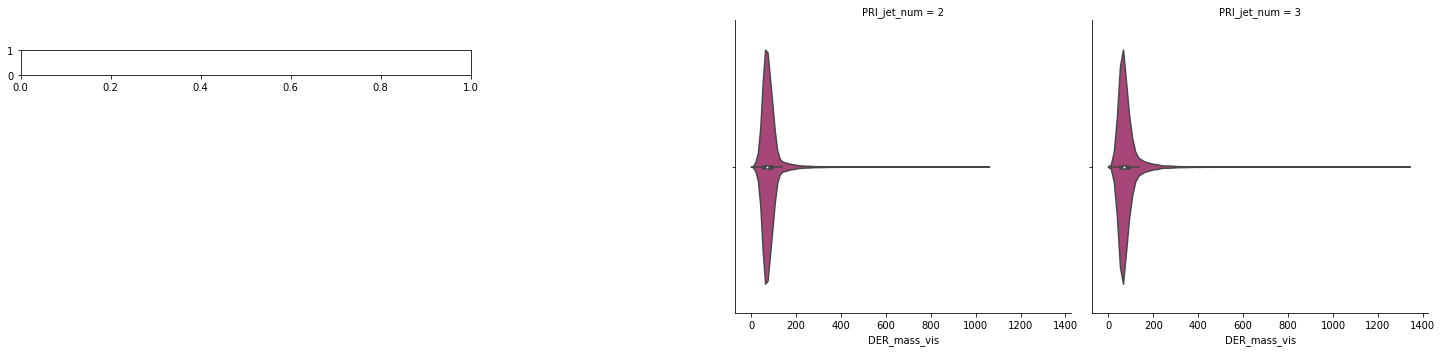

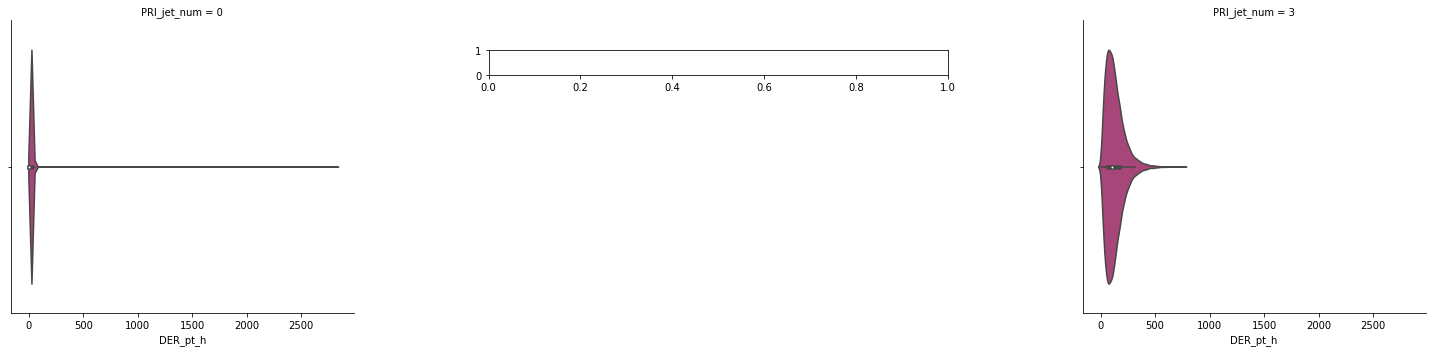

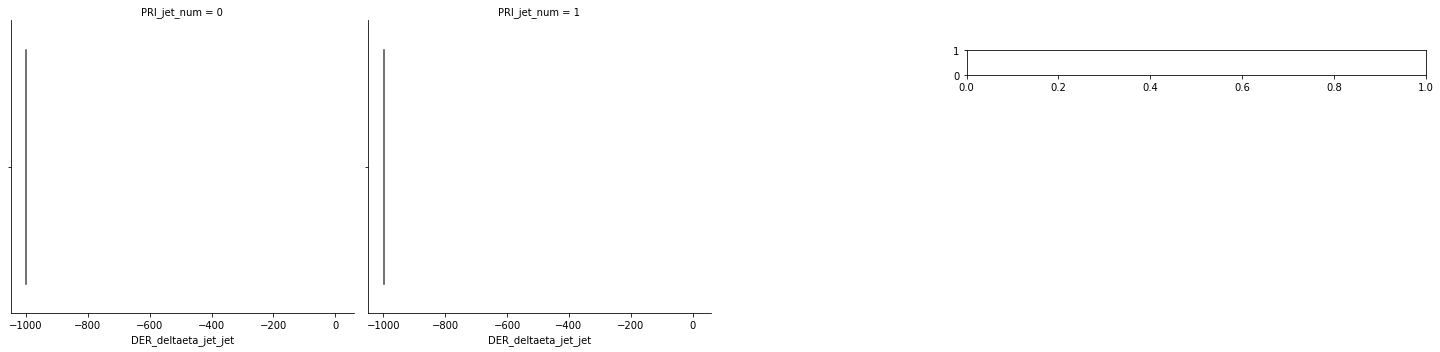

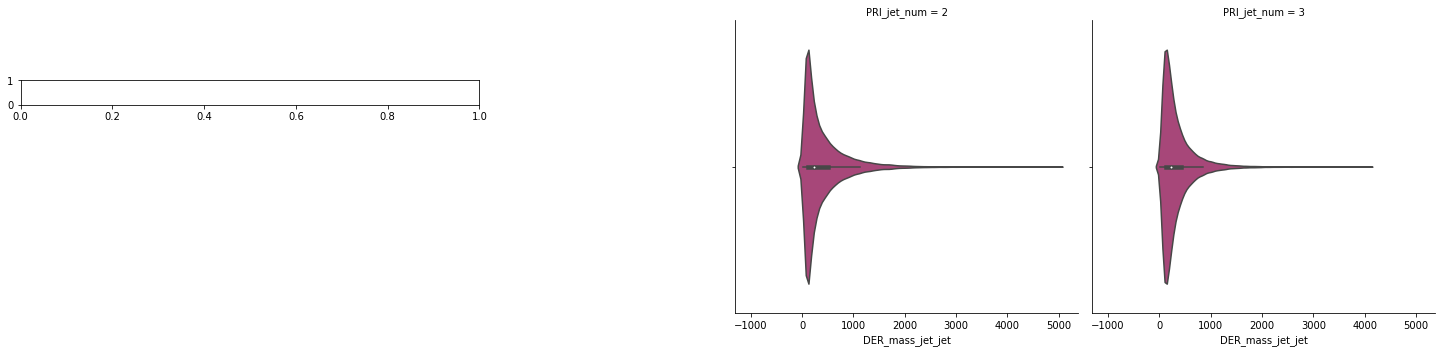

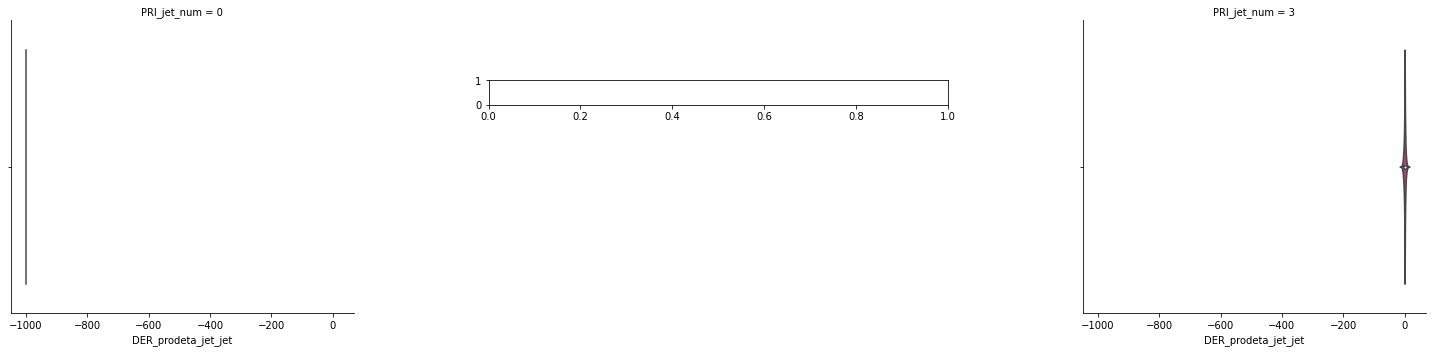

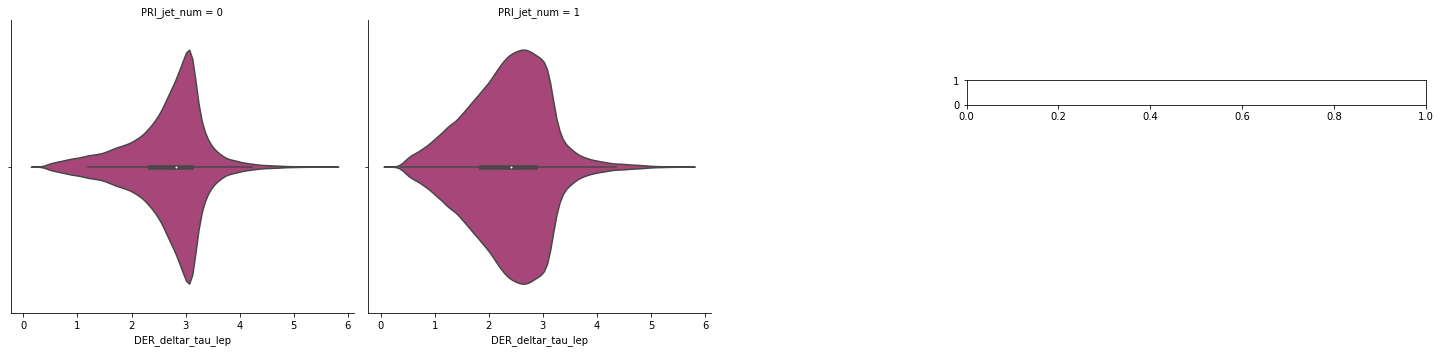

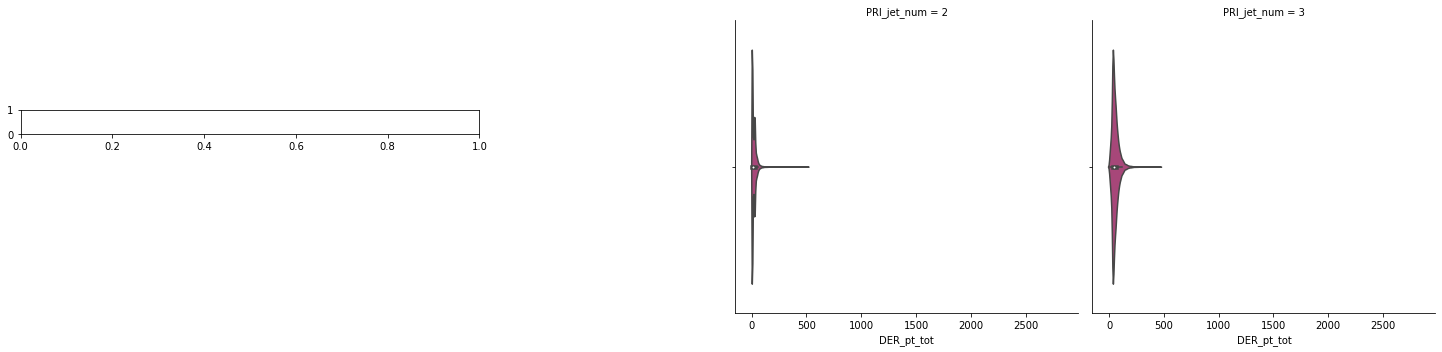

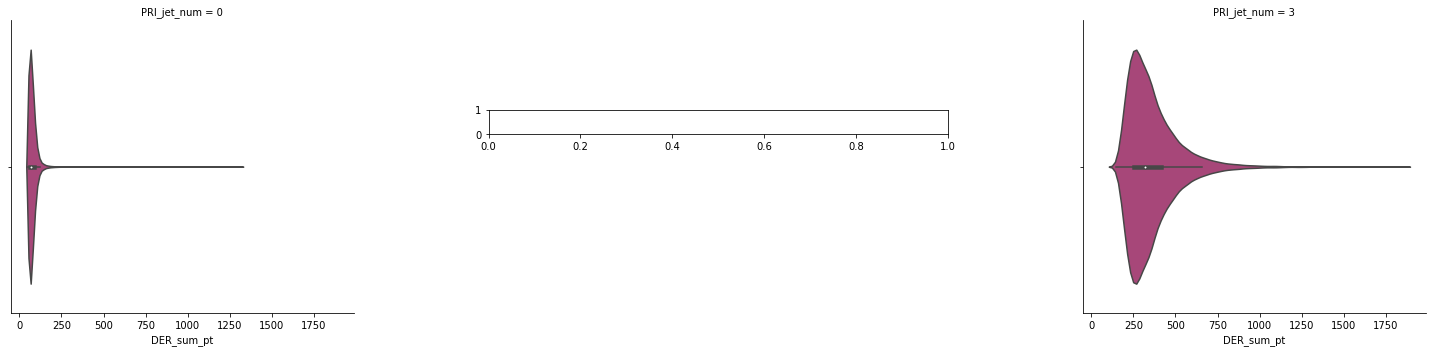

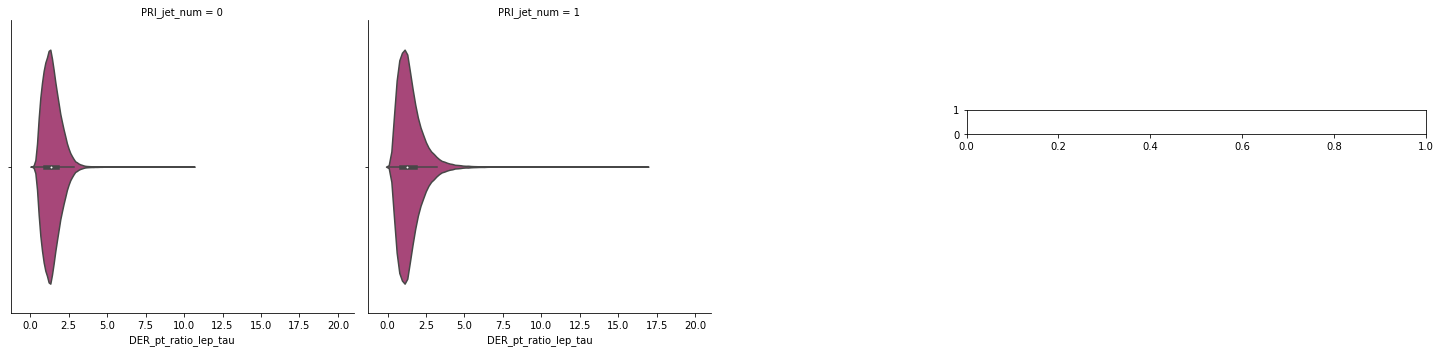

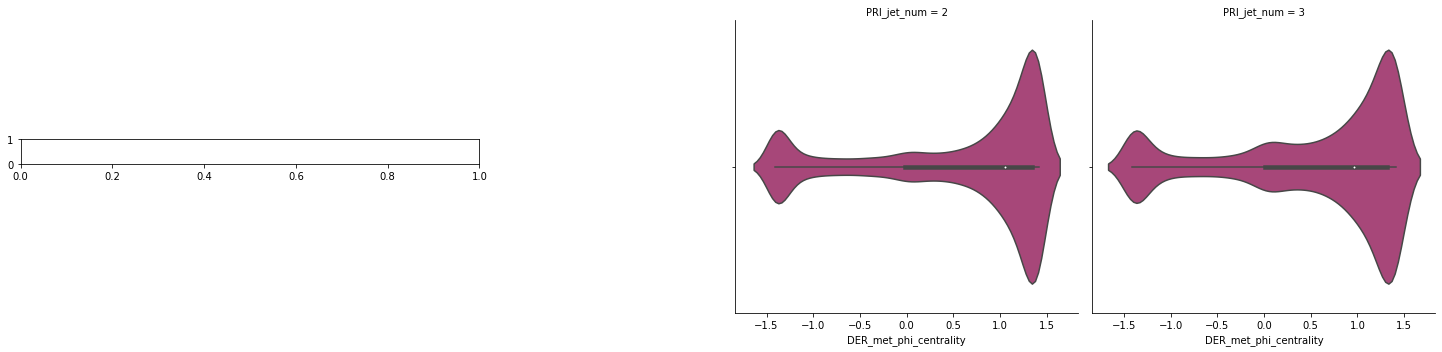

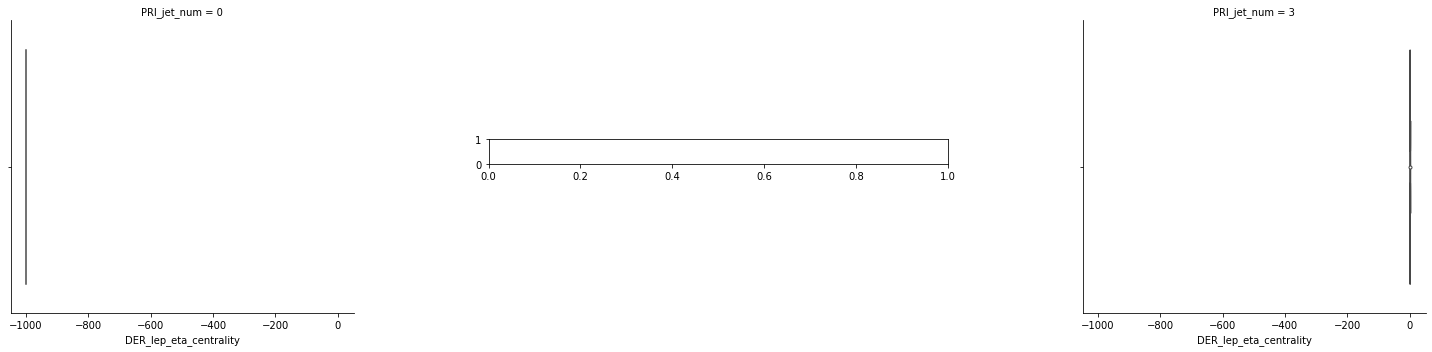

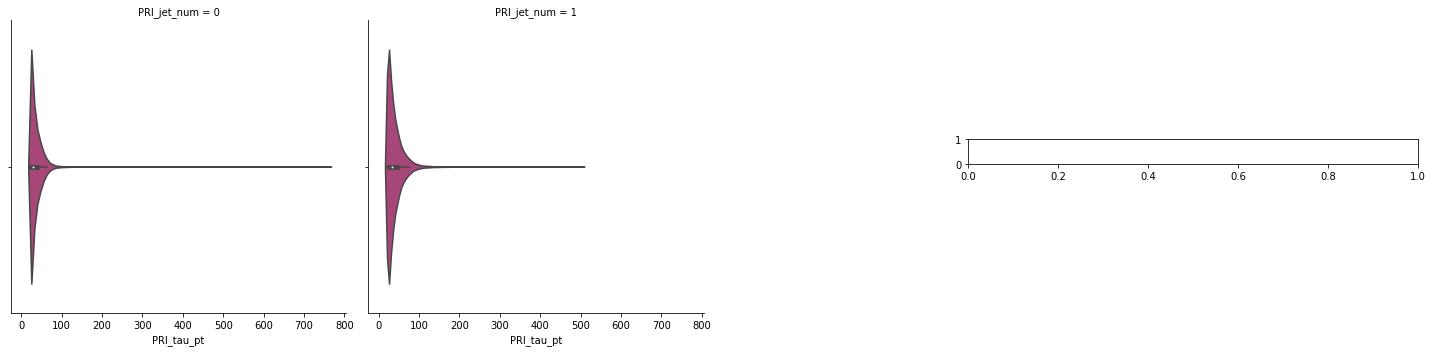

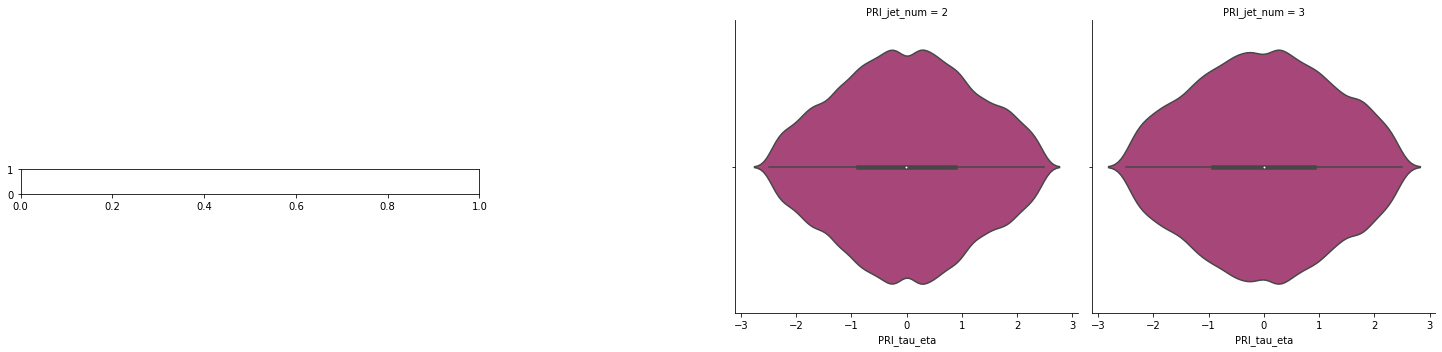

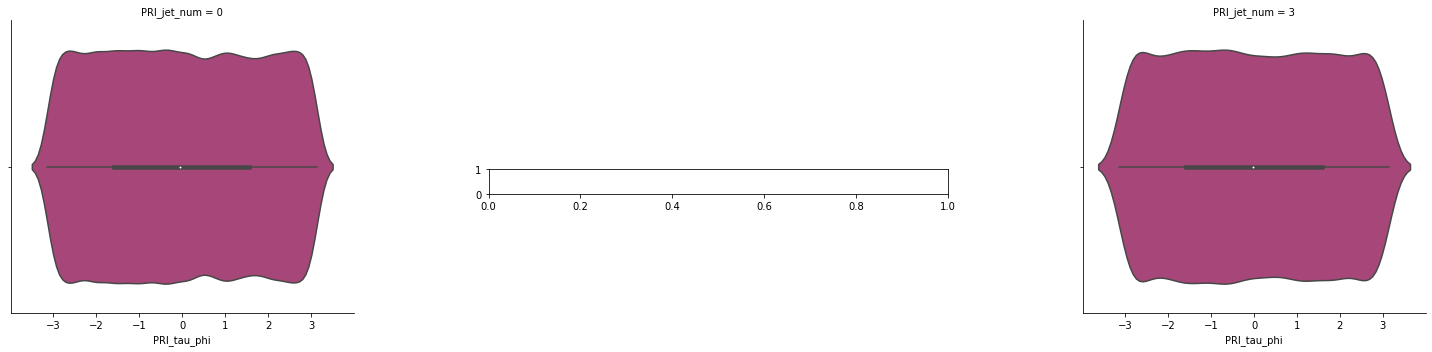

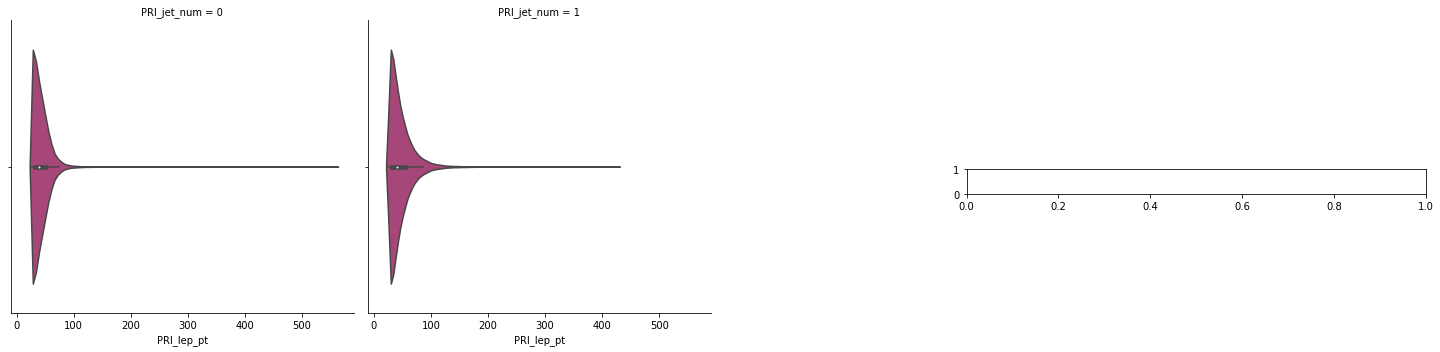

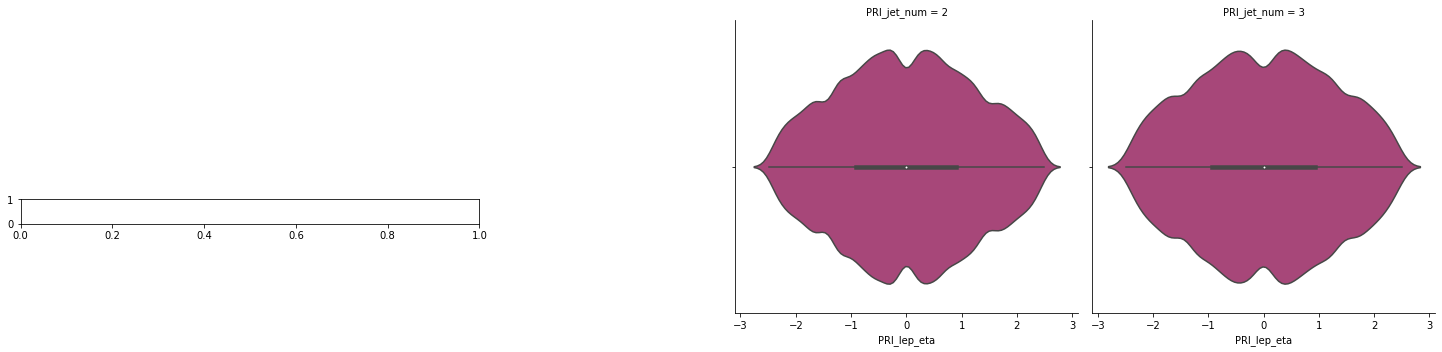

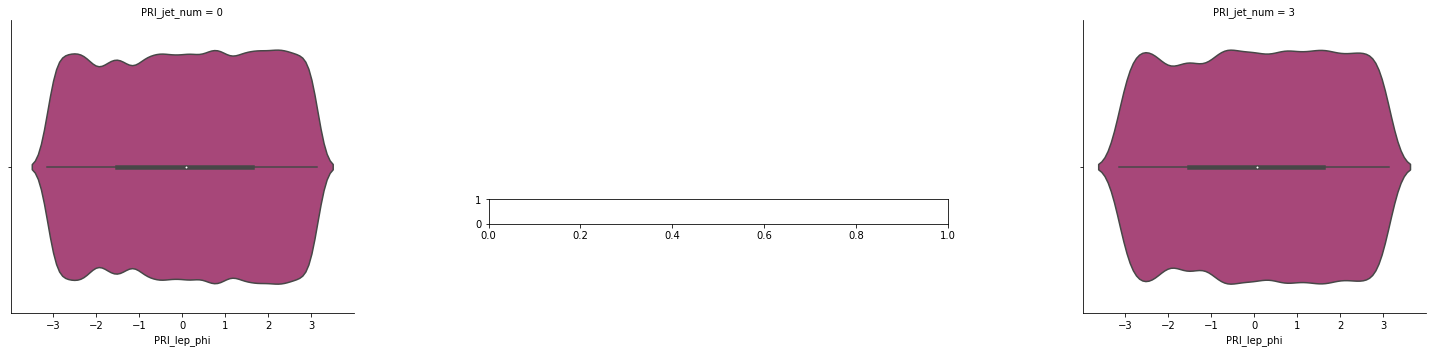

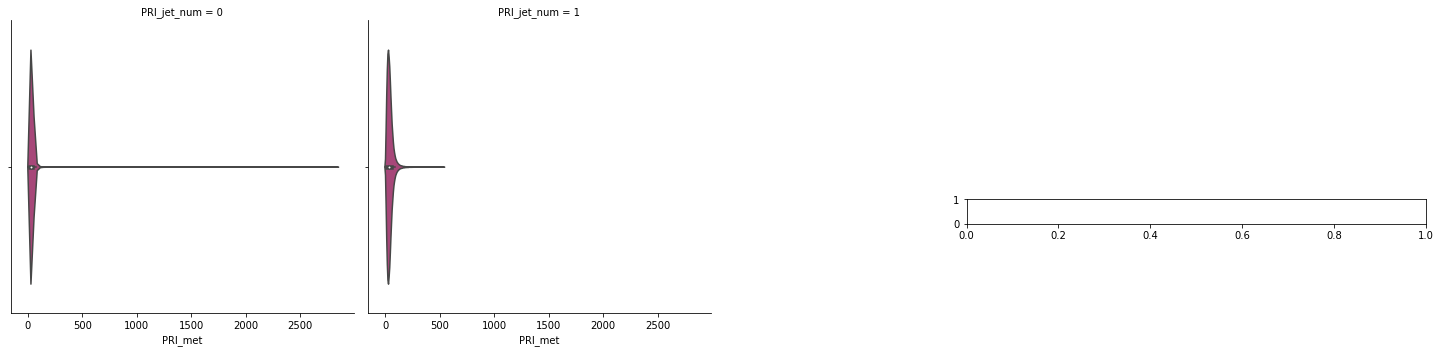

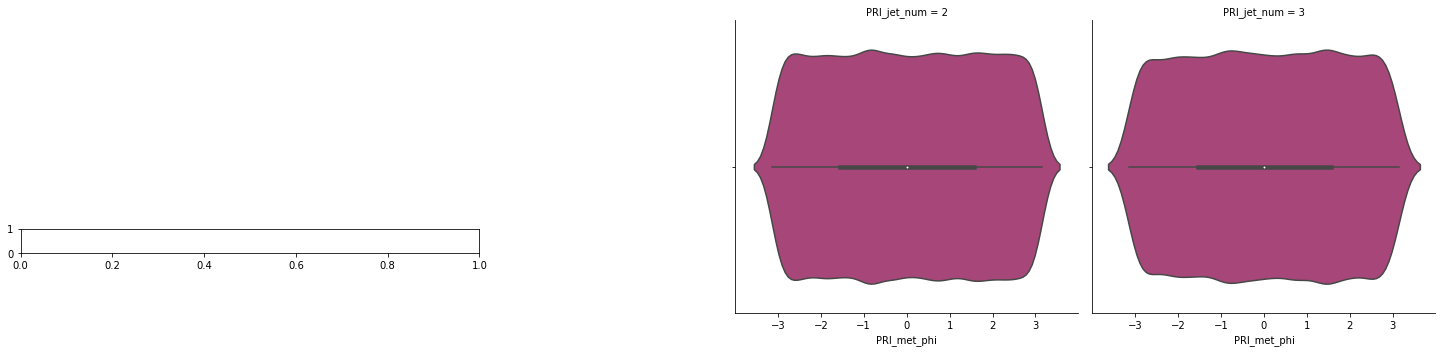

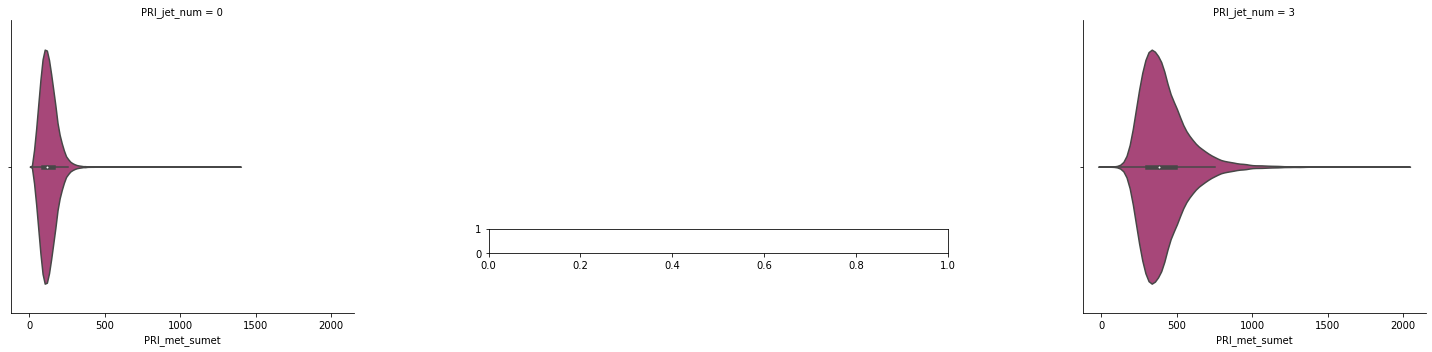

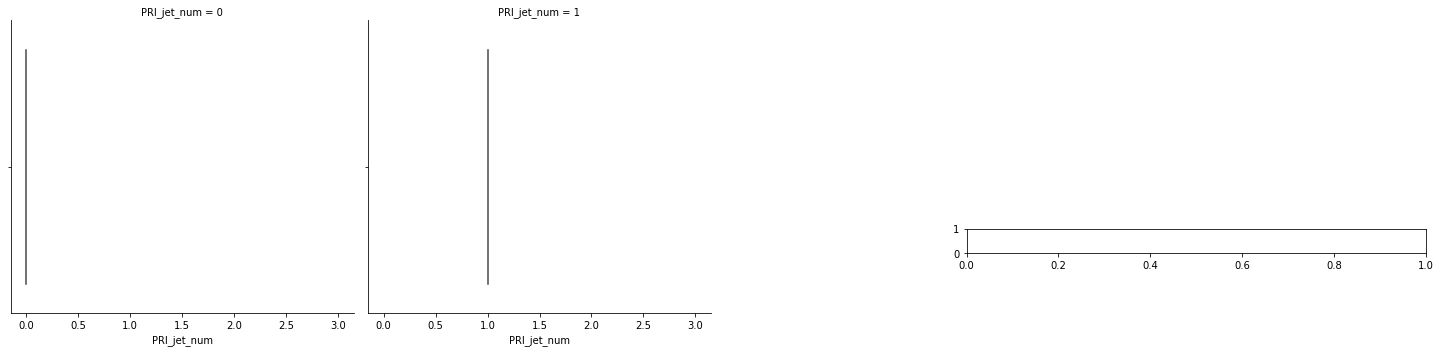

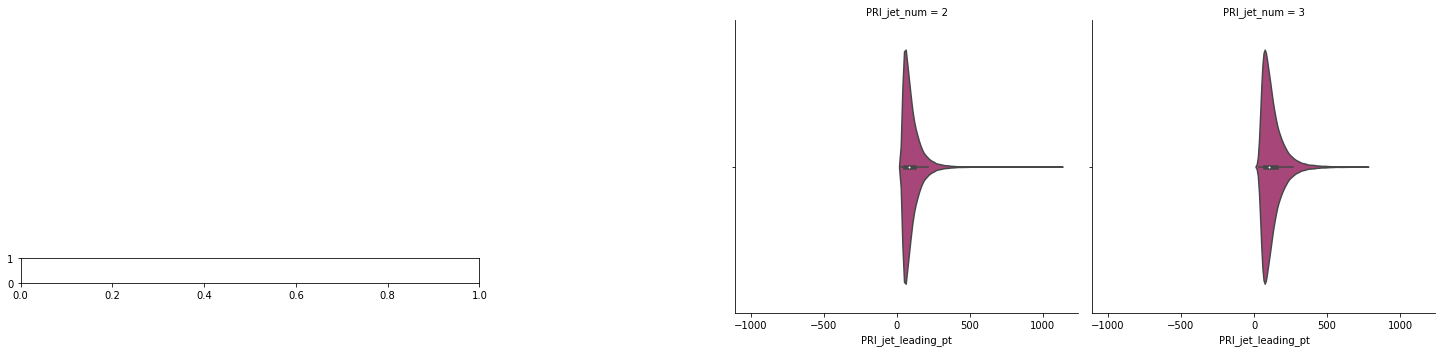

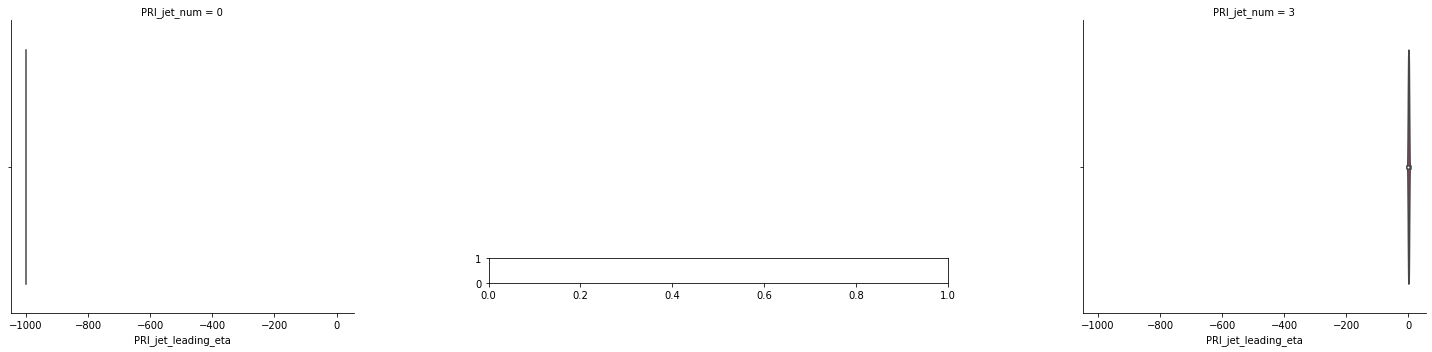

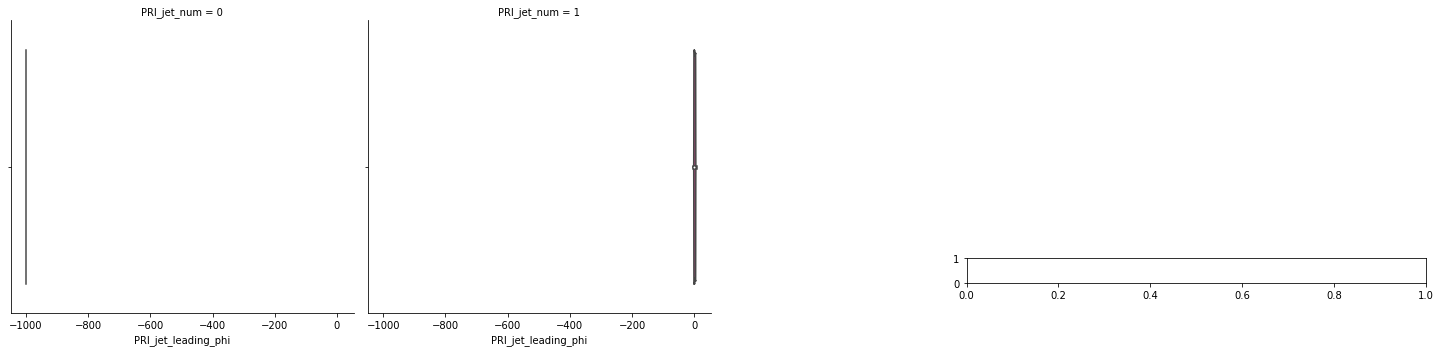

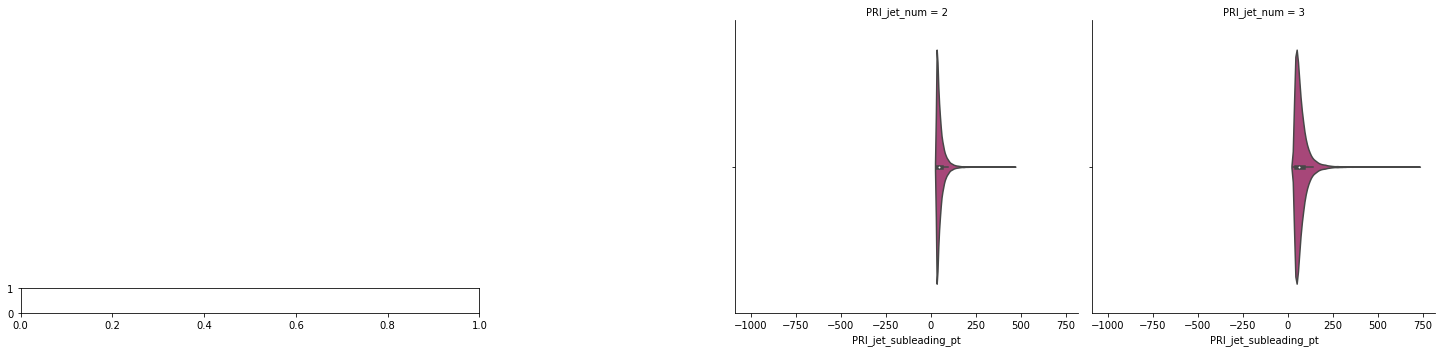

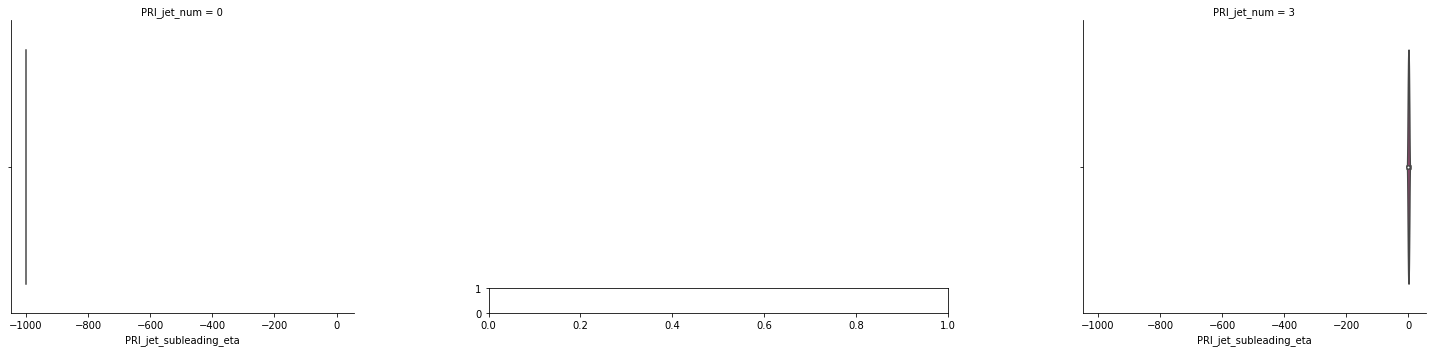

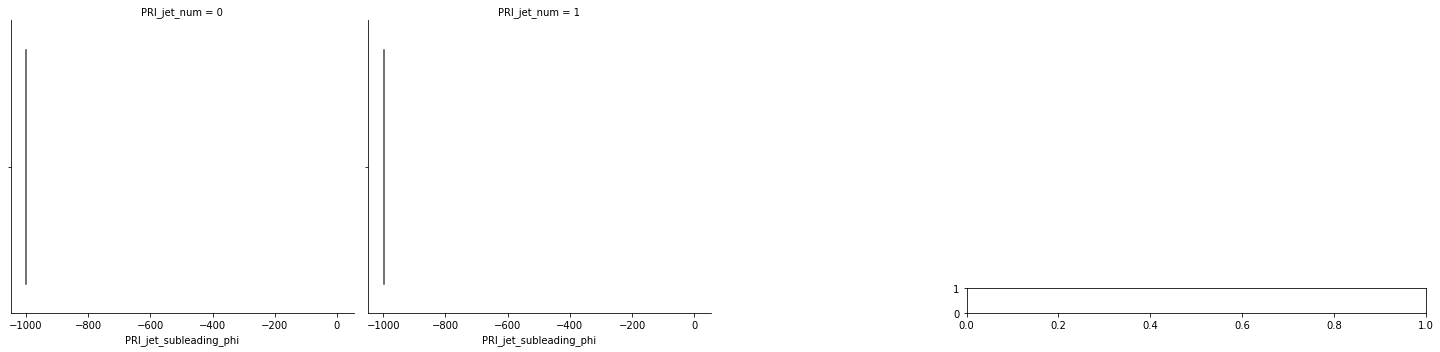

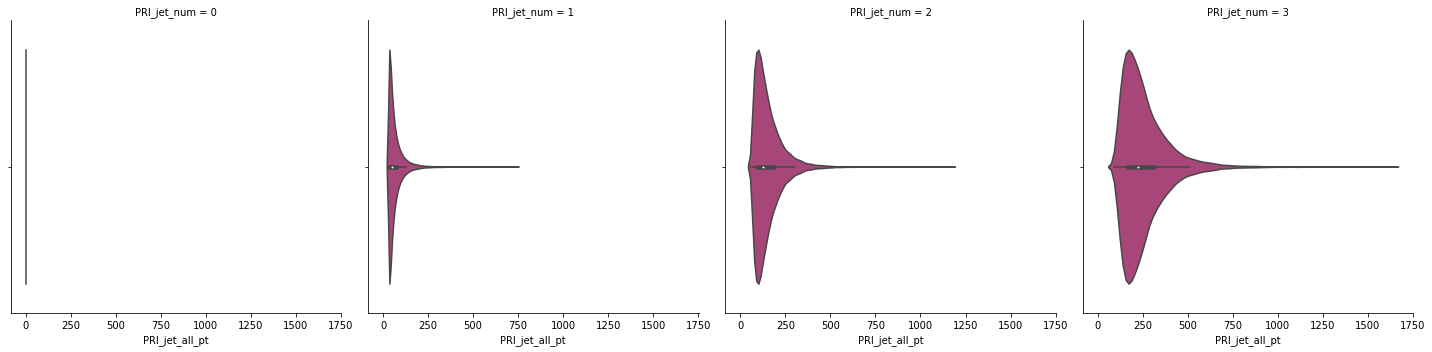

In [37]:
def seaborn_plot_features(df):
    i=0
    for feature_name in df.columns[2:]:
        plt.subplot(10,3,i+1)
        sns.catplot(data=df, col="PRI_jet_num",x=feature_name, palette="magma", kind = "violin", split = True)
        i+=1
seaborn_plot_features(df)

In [6]:
print([tX[:, col].dtype for col in range(30)])

[dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64')]


In [40]:
for i in range(3):
    print(list(tX[i]))

[138.47, 51.655, 97.827, 27.98, 0.91, 124.711, 2.666, 3.064, 41.928, 197.76, 1.582, 1.396, 0.2, 32.638, 1.017, 0.381, 51.626, 2.273, -2.414, 16.824, -0.277, 258.733, 2.0, 67.435, 2.15, 0.444, 46.062, 1.24, -2.475, 113.497]
[160.937, 68.768, 103.235, 48.146, -999.0, -999.0, -999.0, 3.473, 2.078, 125.157, 0.879, 1.414, -999.0, 42.014, 2.039, -3.011, 36.918, 0.501, 0.103, 44.704, -1.916, 164.546, 1.0, 46.226, 0.725, 1.158, -999.0, -999.0, -999.0, 46.226]
[-999.0, 162.172, 125.953, 35.635, -999.0, -999.0, -999.0, 3.148, 9.336, 197.814, 3.776, 1.414, -999.0, 32.154, -0.705, -2.093, 121.409, -0.953, 1.052, 54.283, -2.186, 260.414, 1.0, 44.251, 2.053, -2.028, -999.0, -999.0, -999.0, 44.251]


In [11]:
np.count_nonzero(tX == -999, axis=0)

array([ 38114,      0,      0,      0, 177457, 177457, 177457,      0,
            0,      0,      0,      0, 177457,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,  99913,
        99913,  99913, 177457, 177457, 177457,      0])

In [42]:
row_nan_pct = np.count_nonzero(tX == -999, axis=0) / len(tX)

In [43]:
row_nan_pct 

array([0.152456, 0.      , 0.      , 0.      , 0.709828, 0.709828,
       0.709828, 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.709828, 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.399652,
       0.399652, 0.399652, 0.709828, 0.709828, 0.709828, 0.      ])

In [45]:
np.count_nonzero(row_nan_pct == 0)

19

In [51]:
non_nan_cols = (row_nan_pct == 0)

In [52]:
non_nan_cols

array([False,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False,  True])

In [53]:
tX_new = tX[:, non_nan_cols]

In [54]:
tX_new.shape

(250000, 19)

In [63]:
tX_new.shape

(250000, 19)

In [64]:
from implementations import build_poly
tX_poly = build_poly(tX_new, 7)

In [65]:
tX_poly.shape

(19, 250000, 8)

In [83]:
from implementations import ridge_regression_kfold
weights, lambda_, loss, accuracy, f1 = ridge_regression_kfold(y, tX_new)

In [86]:
print(f'{weights=}\n{lambda_=}\n{loss=}\n{accuracy=}\n{f1=}')

weights=array([-8.20161480e-03, -3.33148311e-03, -3.43187966e-04,  1.18378637e-01,
       -1.68390878e-03,  1.78322990e-03, -3.14669530e-01,  1.26590352e-01,
        1.43647534e-03, -8.59534906e-04, -1.28712503e-03,  1.10000176e-02,
        7.81830952e-04,  3.11060158e-04,  1.98643482e-03,  2.35543825e-04,
       -1.09092679e-03,  1.71299503e-02, -1.40219709e-03])
lambda_=0.0001
loss=0.8514766693980778
accuracy=0.724084
f1=0.6778866982685252


In [78]:
from implementations import predict
y_pred = predict(tX_new, weights)

In [79]:
y_pred

array([[-0.19484935],
       [-0.06108761],
       [-0.89854754],
       ...,
       [-0.29931265],
       [ 0.19327472],
       [-0.45989102]])

In [69]:
DATA_TEST_PATH = 'data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [70]:
tX_test.shape

(568238, 30)

In [71]:
tX_test_new = tX_test[:, non_nan_cols]

In [72]:
tX_test_new.shape

(568238, 19)

In [73]:
from datetime import datetime
method = 'ridge_regression_cv'
time = datetime.now().strftime('%Y%m%dH%H%M%S')
OUTPUT_PATH = f'submissions/submission_{method}_{time}' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test_new)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)